In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net2
from utils import train, test

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net2().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             288
              ReLU-2           [-1, 32, 28, 28]               0
            Conv2d-3           [-1, 64, 28, 28]          18,432
              ReLU-4           [-1, 64, 28, 28]               0
            Conv2d-5           [-1, 32, 28, 28]           2,048
              ReLU-6           [-1, 32, 28, 28]               0
         MaxPool2d-7           [-1, 32, 14, 14]               0
            Conv2d-8           [-1, 32, 12, 12]           9,216
              ReLU-9           [-1, 32, 12, 12]               0
           Conv2d-10           [-1, 64, 10, 10]          18,432
             ReLU-11           [-1, 64, 10, 10]               0
           Conv2d-12           [-1, 32, 10, 10]           2,048
             ReLU-13           [-1, 32, 10, 10]               0
        MaxPool2d-14             [-1, 3

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [5]:
model = Net2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)

Epoch 1


Train: Loss=0.5595 Batch_id=468 Accuracy=28.35: 100%|██████████| 469/469 [00:19<00:00, 24.32it/s]


Test set: Average loss: 0.5056, Accuracy: 8449/10000 (84.49%)

Epoch 2


Train: Loss=0.0364 Batch_id=468 Accuracy=93.88: 100%|██████████| 469/469 [00:18<00:00, 24.90it/s]


Test set: Average loss: 0.0881, Accuracy: 9730/10000 (97.30%)

Epoch 3


Train: Loss=0.0950 Batch_id=468 Accuracy=97.38: 100%|██████████| 469/469 [00:19<00:00, 24.41it/s]


Test set: Average loss: 0.0795, Accuracy: 9750/10000 (97.50%)

Epoch 4


Train: Loss=0.0397 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:19<00:00, 24.10it/s]


Test set: Average loss: 0.0501, Accuracy: 9831/10000 (98.31%)

Epoch 5


Train: Loss=0.1072 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:20<00:00, 23.12it/s]


Test set: Average loss: 0.0405, Accuracy: 9863/10000 (98.63%)

Epoch 6


Train: Loss=0.0201 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:20<00:00, 23.20it/s]


Test set: Average loss: 0.0456, Accuracy: 9852/10000 (98.52%)

Epoch 7


Train: Loss=0.0277 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:19<00:00, 24.62it/s]


Test set: Average loss: 0.0381, Accuracy: 9880/10000 (98.80%)

Epoch 8


Train: Loss=0.0071 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:19<00:00, 24.37it/s]


Test set: Average loss: 0.0359, Accuracy: 9868/10000 (98.68%)

Epoch 9


Train: Loss=0.0030 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:20<00:00, 23.39it/s]


Test set: Average loss: 0.0340, Accuracy: 9897/10000 (98.97%)

Epoch 10


Train: Loss=0.0138 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:20<00:00, 22.69it/s]


Test set: Average loss: 0.0353, Accuracy: 9892/10000 (98.92%)

Epoch 11


Train: Loss=0.0156 Batch_id=468 Accuracy=99.37: 100%|██████████| 469/469 [00:21<00:00, 21.60it/s]


Test set: Average loss: 0.0343, Accuracy: 9895/10000 (98.95%)

Epoch 12


Train: Loss=0.0428 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:20<00:00, 22.61it/s]


Test set: Average loss: 0.0421, Accuracy: 9869/10000 (98.69%)

Epoch 13


Train: Loss=0.0667 Batch_id=468 Accuracy=99.50: 100%|██████████| 469/469 [00:19<00:00, 23.81it/s]


Test set: Average loss: 0.0351, Accuracy: 9891/10000 (98.91%)

Epoch 14


Train: Loss=0.0103 Batch_id=468 Accuracy=99.55: 100%|██████████| 469/469 [00:19<00:00, 24.41it/s]


Test set: Average loss: 0.0413, Accuracy: 9877/10000 (98.77%)

Epoch 15


Train: Loss=0.0042 Batch_id=468 Accuracy=99.54: 100%|██████████| 469/469 [00:19<00:00, 24.11it/s]


Test set: Average loss: 0.0358, Accuracy: 9904/10000 (99.04%)



Text(0.5, 1.0, 'Test Accuracy')

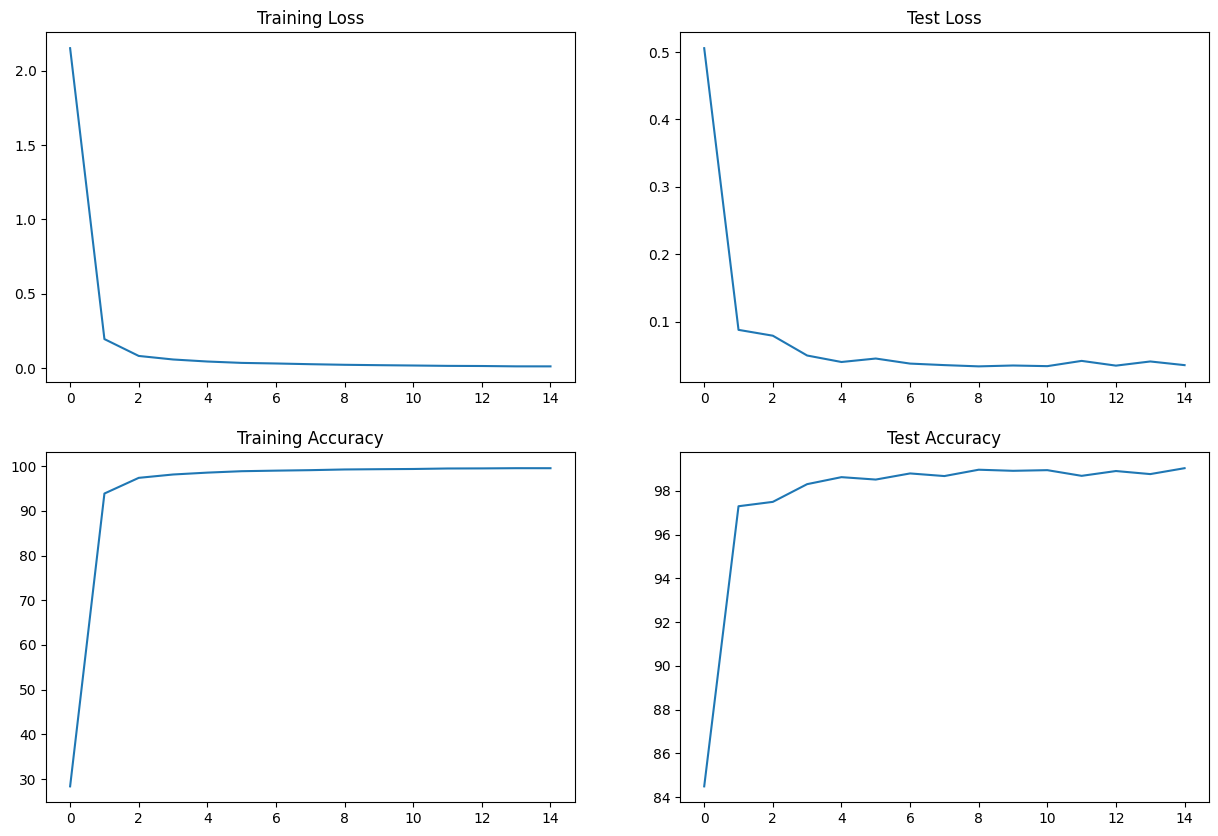

In [6]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [7]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  99.545
best test accuracy :  99.04
